# Giới thiệu
**NHÓM 27:** \
19120544 - Cao Thanh Khiết \
19120533 - Ninh Duy Huy \
19120543 - Hoàng Mạnh Khiêm \

**ĐỀ TÀI:** Thay đổi kích thước ảnh bằng phương pháp “Seam Carving” \

**CÁC BƯỚC THỰC HIỆN:** \
- Bước 1: Chuyển ảnh RGB sang ảnh grayscale.
- Bước 2: Sử dụng Edge Detection để xác định độ quan trọng của các pixels.
    + Greedy Algorithm.
    + Dynamic Programming.
- Bước 3: Xác định seam ít quan trọng nhất.
- Bước 4: Loại bỏ seam ít quan trọng nhất.

=> Lặp lại các bước trên cho đến khi đạt được chiều rộng mong muốn

**Tối ưu hóa:** \
- Improvement version 1: Sử dụng Dynamic Programming thay thế cho Greedy Algorithm trên phần code tuần tự.
- Improvement version 2: Cài đặt song song hóa.
- Improvement version 3: Sử dụng SMEM để lưu trữ image matrix.
- Improvement version 4: Sử dụng SMEM để lưu trữ image matrix và CMEM để lưu trữ kernel filter.

# Project: Seam carving

## Import

In [1]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numba import cuda

## Hàm hỗ trợ

In [2]:
def show_result_img(img_name):
    fig = plt.figure(figsize=(15, 25))
    rows = 5
    columns = 2

    # reading images
    input_image = cv2.imread(img_name)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    edge_detect_image = cv2.imread('out_edgeDetect.pnm')
    edge_detect_image = cv2.cvtColor(edge_detect_image, cv2.COLOR_BGR2RGB)

    out_host = cv2.imread('out_host.pnm')
    out_host= cv2.cvtColor(out_host, cv2.COLOR_BGR2RGB)

    out_host1 = cv2.imread('out_host1.pnm')
    out_host1 = cv2.cvtColor(out_host1, cv2.COLOR_BGR2RGB)

    # out_device2 = cv2.imread('out_device2.pnm')
    # out_device2 = cv2.cvtColor(out_device2, cv2.COLOR_BGR2RGB)

    # out_device3 = cv2.imread('out_device3.pnm')
    # out_device3 = cv2.cvtColor(out_device3, cv2.COLOR_BGR2RGB)

    # out_device4 = cv2.imread('out_device4.pnm')
    # out_device4 = cv2.cvtColor(out_device4, cv2.COLOR_BGR2RGB)
    
    # Row 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(input_image)
    plt.axis('off')
    plt.title('Input image')
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(edge_detect_image)
    plt.axis('off')
    plt.title('Edge Detection')

    # Row 2
    fig.add_subplot(rows, columns, 3)
    plt.imshow(input_image)
    plt.axis('off')
    plt.title('Input image')
    
    fig.add_subplot(rows, columns, 4)
    plt.imshow(out_host)
    plt.axis('off')
    plt.title('Host')
    
    # Row 3
    fig.add_subplot(rows, columns, 5)
    plt.imshow(input_image)
    plt.axis('off')
    plt.title('Input image')
    
    fig.add_subplot(rows, columns, 6)
    plt.imshow(out_host1)
    plt.axis('off')
    plt.title("Improvement version 1")

    # # Row 4
    # fig.add_subplot(rows, columns, 7)
    # plt.imshow(input_image)
    # plt.axis('off')
    # plt.title('Input image')
    
    # fig.add_subplot(rows, columns, 8)
    # plt.imshow(out_device2)
    # plt.axis('off')
    # plt.title("Improvement version 2")

    # # Row 5
    # fig.add_subplot(rows, columns, 9)
    # plt.imshow(input_image)
    # plt.axis('off')
    # plt.title('Input image')

    # fig.add_subplot(rows, columns, 10)
    # plt.imshow(out_device3)
    # plt.axis('off')
    # plt.title("Improvement version 3")

    # # Row 6
    # fig.add_subplot(rows, columns, 11)
    # plt.imshow(input_image)
    # plt.axis('off')
    # plt.title('Input image')
    
    # fig.add_subplot(rows, columns, 12)
    # plt.imshow(out_device4)
    # plt.axis('off')
    # plt.title("Improvement version 4")

In [3]:
def show_matrix(matrix_file):
  m = np.loadtxt(matrix_file)
  m = m + m.min()
  m = m / m.max()
  m = m * 255
  m = m.astype(np.uint8)
  return Image.fromarray(m)

## Thực thi chương trình

In [4]:
# nvcc -arch=sm_{major}{minor} tên-file.cu -o tên-file-chạy
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


In [5]:
!nvcc -arch=sm_{major}{minor} seam_carving.cu -o seam_carving

## Input image 1

In [6]:
!./seam_carving input_image_1.pnm out.pnm 0.7

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Input image size (width x height): 787 x 444
Output image size (width x height): 550 x 444

Host
Run time: 17792.082031 ms

Host improvement version 1
Run time: 12872.050781 ms


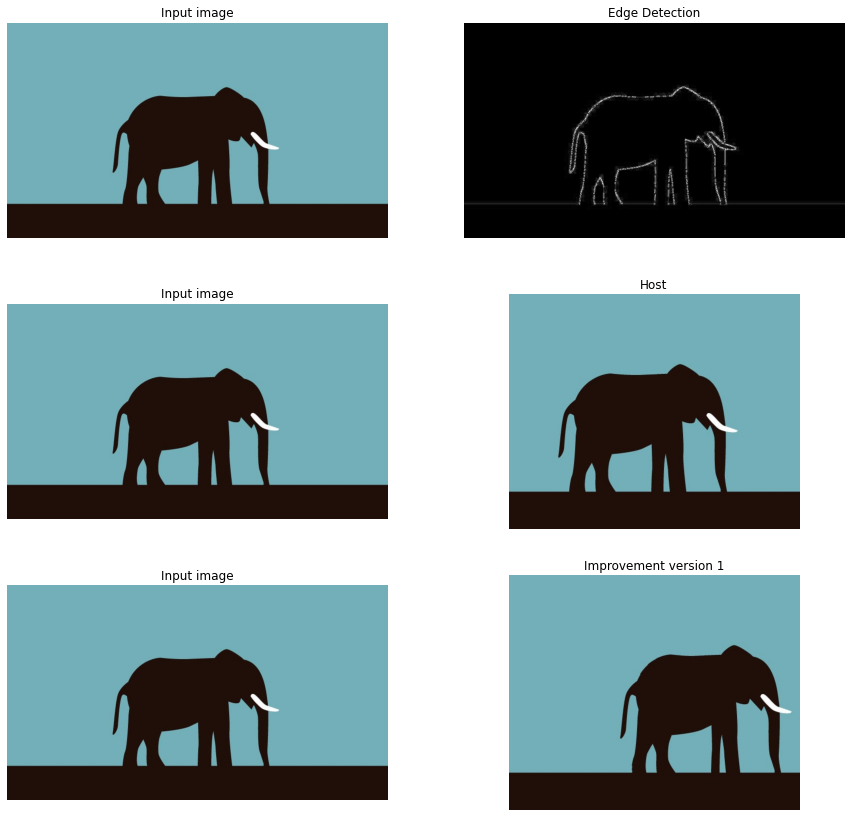

In [7]:
show_result_img('input_image_1.pnm')

## Input image 2

In [8]:
!./seam_carving input_image_2.pnm out.pnm 0.7

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Input image size (width x height): 274 x 186
Output image size (width x height): 191 x 186

Host
Run time: 699.096680 ms

Host improvement version 1
Run time: 711.928955 ms


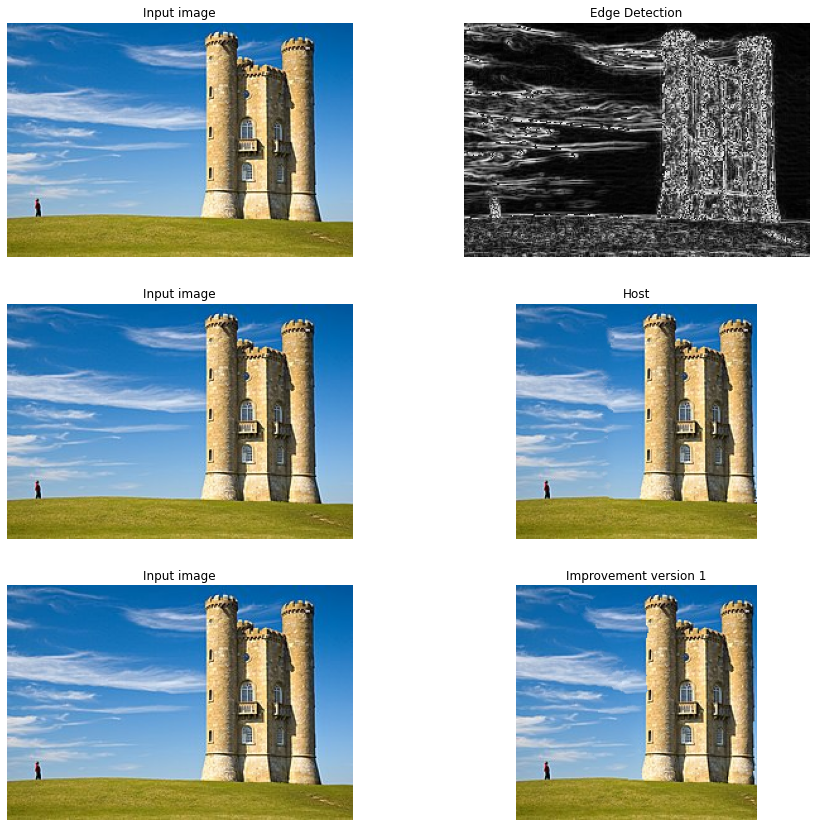

In [9]:
show_result_img('input_image_2.pnm')

## Input image 3

In [10]:
!./seam_carving input_image_3.pnm out.pnm 0.7

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Input image size (width x height): 788 x 599
Output image size (width x height): 551 x 599

Host
Run time: 18053.355469 ms

Host improvement version 1
Run time: 18074.105469 ms


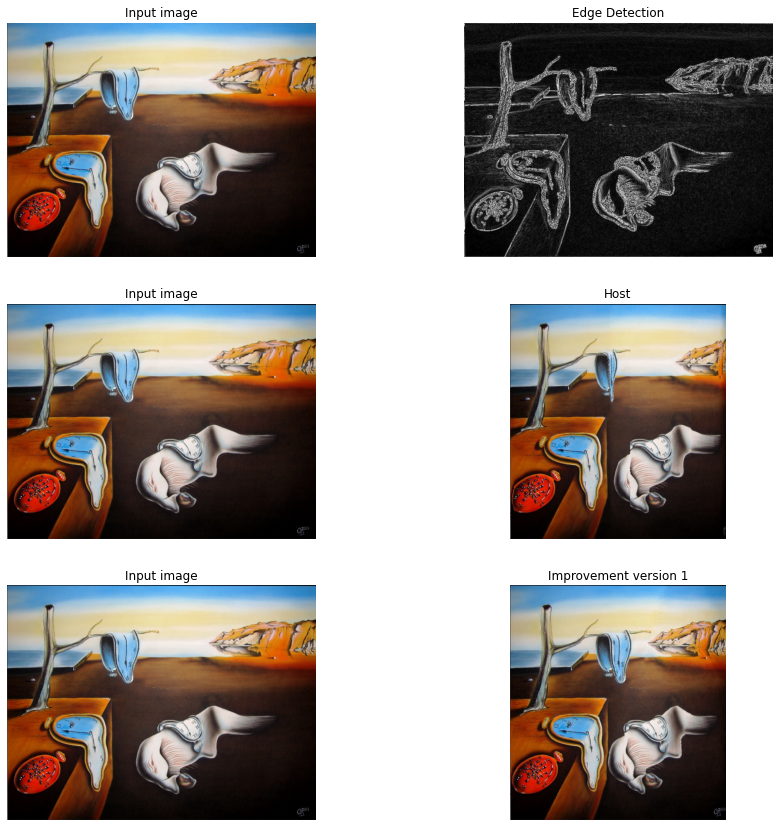

In [11]:
show_result_img('input_image_3.pnm')

## Nhận xét